<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week13/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv"
response = requests.get(url)

with open('AAME.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [4]:
# 컬렴명 확인
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
# 레이블 갯수 확인 (숫자)
df['Close'].value_counts()

,count
Close,
2.00000,292
3.00000,235
2.12500,228
1.87500,208
3.25000,159
...,...
5.09375,1
4.57000,1
4.58000,1


In [6]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
def split_sequence(data: pd.DataFrame, n_steps: int):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data.iloc[i:i + n_steps].values  # ✅ DataFrame 슬라이싱
        seq_y = data.iloc[i + n_steps]['Close']  # ✅ 다음 날 Close만

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [8]:
df = df.drop(['Date', 'Volume', 'Adj Close'], axis=1)

In [9]:
# 1. X, y 만들기
X, y = split_sequence(df, 10)

In [10]:
# 2. train/test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [11]:
# 3. 스케일링 - train으로 fit, test는 transform만. 시계열 데이터는 순서가 정해져 있기 때문에 훈련, 테스트를 나눈 후 정규화
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 4)
X_test_flat = X_test.reshape(-1, 4)

X_train_scaled = scaler.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test_flat).reshape(X_test.shape)


In [12]:
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(8070, 10, 4) (8070,) (2018, 10, 4) (2018,)


In [13]:
# 4. 모델 정의
model = Sequential()
model.add(SimpleRNN(32, activation='tanh', input_shape=(10, 4)))  # 10일, 4개 feature
model.add(Dense(1))  # 다음날 Close 예측
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:

# 5. 학습
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 11.1634
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6874
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2008
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0872
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0579
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0410
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0303
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0276
Epoch 9/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267
Epoch 10/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245
Epoch 11/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0240
Epoch 12/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0237
Epoch 13/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0226
Epoch 14/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0240
Epoch 15/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

In [15]:
# 6. 예측 (test에만)
pred = model.predict(X_test_scaled)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [16]:
# 7. 평가 지표 출력
from sklearn.metrics import mean_squared_error, r2_score

print("Test MSE :", mean_squared_error(y_test, pred))
print("Test R²  :", r2_score(y_test, pred))

Test MSE : 0.00905887791636045
Test R²  : 0.9799818873768286


<ipython-input-17-697bea385644>:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-697bea385644>:10: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-697bea385644>:10: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-697bea385644>:10: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-697bea385644>:10: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserW

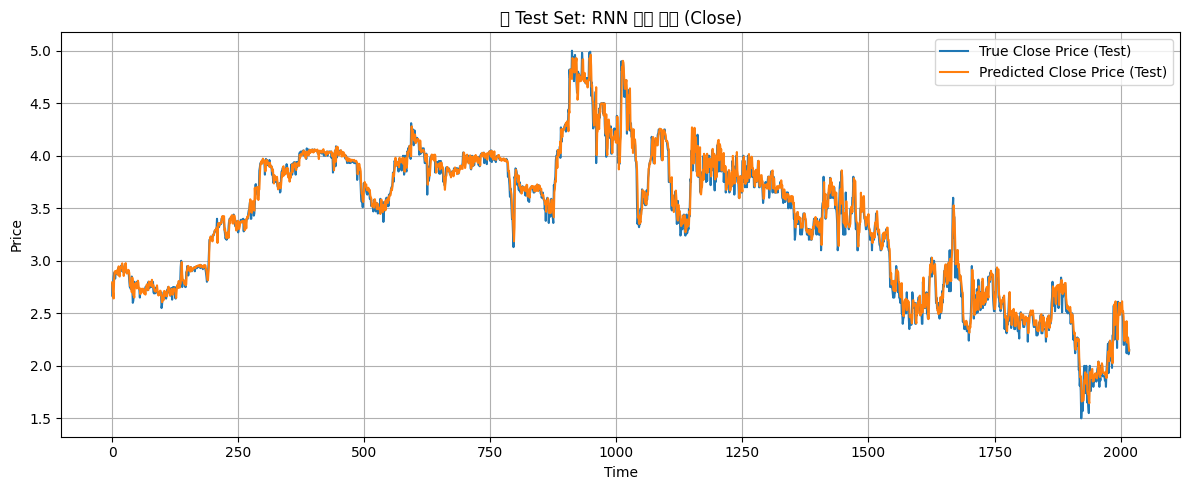

In [17]:
# 8. 시각화
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='True Close Price (Test)')
plt.plot(pred, label='Predicted Close Price (Test)')
plt.title("📉 Test Set: RNN 주가 예측 (Close)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()